In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.utils import plot_model
import numpy as np
import cv2
import os

In [2]:
path = os.getcwd() + '\\augmented_data\\'
example_image = path + '0d0f30d8-bb9e-11e8-b2b9-ac1f6b6435d0_7_red.png'

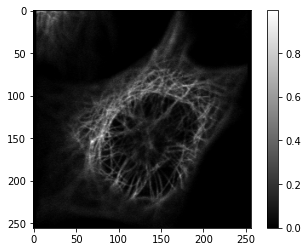

In [4]:
img = np.asarray(cv2.imread(example_image, 0)) / 255
plt.imshow(img, cmap='gray')
plt.colorbar()

In [2]:
def get_random_noise(batch_size, noise_size):
    random_values = np.random.randn(batch_size*noise_size)
    random_noise_batch = np.reshape(random_values, (batch_size, noise_size))
    return random_noise_batch

def get_fake_samples(generator_network, batch_size, noise_size):
    random_noise_batch = get_random_noise(batch_size, noise_size) 
    fake_samples = generator_network.predict_on_batch(random_noise_batch)
    return fake_samples

def get_real_samples(batch_size):
    random_indices = np.random.choice(indices, size=batch_size)
    real_images = trainX[np.array(random_indices),:]
    return real_images

def show_generator_results(generator_network):
    for k in range(9):
        plt.figure(figsize=(7, 7))
        fake_samples = get_fake_samples(generator_network, 9, noise_size)
        for j in range(9):
            plt.subplot(990 + 1 + j)
            plt.imshow(fake_samples[j,:,:,-1], cmap='gray')
            plt.axis('off')
            #plt.title(trainY[i])
        plt.show()
    return

In [3]:
generator_network = tf.keras.models.load_model(os.getcwd() + '\\generator')
generator_network.compile()

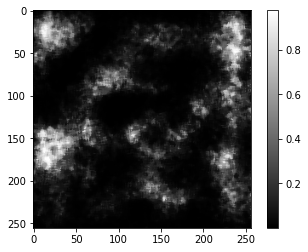

In [52]:
fake_img = get_fake_samples(generator_network, 1, 50).reshape((256, 256))
curve = lambda x: np.sqrt(x)

# gen_img = cv2.resize(curve(fake_img), (128,128))
# gen_img = cv2.medianBlur(gen_img, 3)
gen_img = cv2.medianBlur(fake_img, 5)

plt.imshow(gen_img, cmap='gray')
plt.colorbar()

In [59]:
get_random_noise(1, 100).shape

(1, 100)

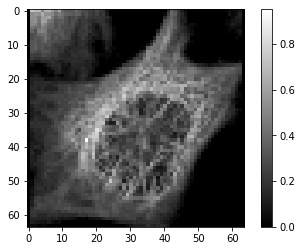

In [22]:
new_img = cv2.resize(img, (64, 64))
curve = lambda x: np.sqrt(x)

brightened_img = curve(new_img)

plt.imshow(brightened_img, cmap='gray')
plt.colorbar()

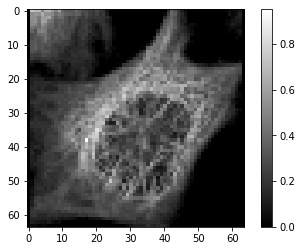

In [34]:
# try to add noise maybe?

new_img = cv2.resize(img, (64, 64))
curve = lambda x: np.sqrt(x) if np.random.random(1) > .05 else x

brightened_img = curve(new_img)

plt.imshow(brightened_img, cmap='gray')
plt.colorbar()

In [6]:
generator_network.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50)]              0         
                                                                 
 dense (Dense)               (None, 1200)              61200     
                                                                 
 batch_normalization (BatchN  (None, 1200)             4800      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 1000)              1201000   
                                                                 
 batch_normalization_1 (Batc  (None, 1000)             4000      
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 65536)             656015

(-0.5, 4.5, 9.5, -0.5)

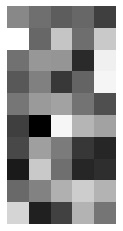

In [9]:
noise = get_random_noise(1, 50)
plt.imshow(noise.reshape(10,5), cmap='gray')
plt.axis('off')

In [2]:
discriminator_network = tf.keras.models.load_model(os.getcwd() + '\\discriminator')

discriminator_network.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 1)]     0         
                                                                 
 flatten (Flatten)           (None, 65536)             0         
                                                                 
 dense_3 (Dense)             (None, 256)               16777472  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 129 

In [3]:
discriminator_network.layers[-1].get_config()

{'name': 'activation_1',
 'trainable': False,
 'dtype': 'float32',
 'activation': 'sigmoid'}